In [1]:
# changed to yfinance
import yfinance as yf
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import random
import pandas_datareader.data as web
import pandas as pd

In [2]:
def get_prices(share_symbol, start_date, end_date,
               cache_filename='../../data/cache/stock_prices.npy', force=False):
    try:
        if force:
            raise IOError
        else:
            stock_prices = np.load(cache_filename)
    except IOError:
        #share = Share(share_symbol)
        #stock_hist = ystockquote.get_historical_prices(share_symbol, start_date, end_date)
        stock_hist = yf.download(share_symbol, start=start_date, end=end_date)
        #stock_hist = share.get_historical(start_date, end_date)
        stock_prices = []
        stock_hist = stock_hist.sort_values(by=['Date'])
        for index, day in stock_hist.iterrows():
            stock_val = day['Open'].astype(float)
            stock_prices.append(stock_val)
            
        stock_prices = np.asarray(stock_prices)
        #stock_prices = [stock_price['Open'] for stock_price in stock_hist]
        np.save(cache_filename, stock_prices)
        
    return stock_prices.astype(float)

In [3]:
def plot_prices(prices):
    plt.title('Opening stock prices')
    plt.xlabel('day')
    plt.ylabel('price ($)')
    plt.plot(prices)
    plt.savefig('../../data/cache/prices.png')
    plt.show()

In [4]:
class DecisionPolicy:
    '''
    Given a state, the decision policy will calculate the next action to take.
    '''
    def select_action(self, current_state, step):
        pass

    '''
    Improve the Q-function from a new experience of taking an action.
    '''
    def update_q(self, state, action, reward, next_state):
        pass

In [5]:
class RandomDecisionPolicy(DecisionPolicy):
    def __init__(self, actions):
        self.actions = actions
    def select_action(self, current_state, step):
        action = random.choice(self.actions)
        return action

In [6]:
def run_simulation(policy, initial_budget, initial_num_stocks, prices, hist):
    budget = initial_budget # The state is a hist + 2 dimensional vector. You’ll force it to be a NumPy matrix.
    # Calculates the portfolio value
    num_stocks = initial_num_stocks
    share_value = 0
    transitions = list()
    for i in range(len(prices) - hist - 1):
        # Initializes values that depend on computing the net worth of a portfolio
        if i % 1000 == 0:
            print('progress {:.2f}%'.format(float(100*i) / (len(prices) - hist - 1)))
        current_state = np.asmatrix(np.hstack((prices[i:i+hist], budget, num_stocks)))
        current_portfolio = budget + num_stocks * share_value
        action = policy.select_action(current_state, i)
        share_value = float(prices[i + hist])
        
        if action == 'Buy' and budget >= share_value:
            budget -= share_value
            num_stocks += 1
        elif action == 'Sell' and num_stocks > 0:
            budget += share_value
            num_stocks -= 1
        else:
            action = 'Hold'

        # Updates portfolio values based on action
        new_portfolio = budget + num_stocks * share_value
        reward = new_portfolio - current_portfolio
        next_state = np.asmatrix(np.hstack((prices[i+1:i+hist+1], budget, num_stocks)))
        transitions.append((current_state, action, reward, next_state))

        policy.update_q(current_state, action, reward, next_state)
    
    #print(transitions)
    portfolio = budget + num_stocks * share_value
    return portfolio

In [7]:
def run_simulations(policy, budget, num_stocks, prices, hist):
# Updates the policy after experiencing a new action
 
    num_tries = 10
    final_portfolios = list()
    for i in range(num_tries):
        # Stores the portfolio worth of each run in this array
        # Runs this simulation
        final_portfolio = run_simulation(policy, budget, num_stocks, prices, hist)
        final_portfolios.append(final_portfolio)
        print('Final portfolio: ${}'.format(final_portfolio))
        plt.title('Final Portfolio Value')
        plt.xlabel('Simulation #')
        plt.ylabel('Net worth')
        plt.plot(final_portfolios)
        plt.show()


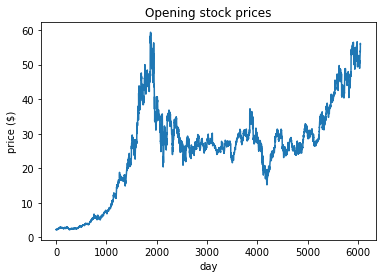

progress 0.00%
progress 16.55%
progress 33.10%
progress 49.65%
progress 66.20%
progress 82.75%
progress 99.30%
Final portfolio: $105402.66341495514


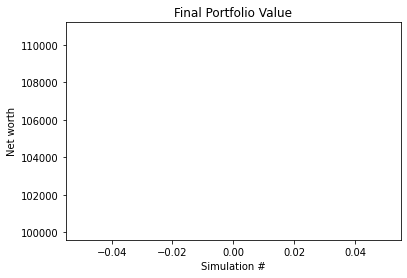

progress 0.00%
progress 16.55%
progress 33.10%
progress 49.65%
progress 66.20%
progress 82.75%
progress 99.30%
Final portfolio: $102765.38171291351


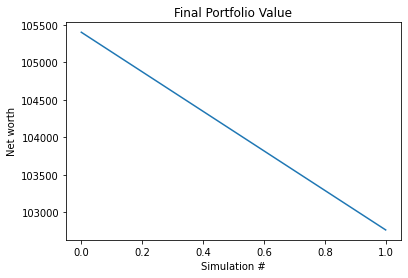

progress 0.00%
progress 16.55%
progress 33.10%
progress 49.65%
progress 66.20%
progress 82.75%
progress 99.30%
Final portfolio: $101074.4025554657


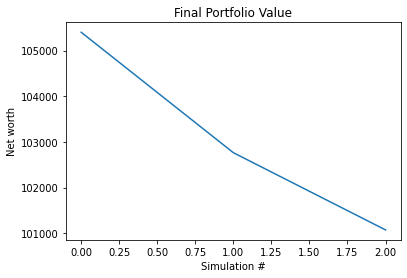

progress 0.00%
progress 16.55%
progress 33.10%
progress 49.65%
progress 66.20%
progress 82.75%
progress 99.30%
Final portfolio: $100039.71245479584


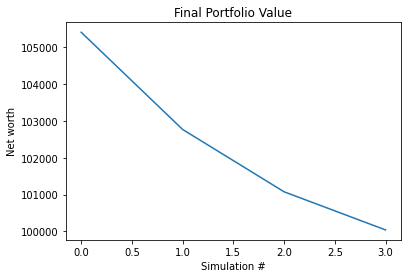

progress 0.00%
progress 16.55%
progress 33.10%
progress 49.65%
progress 66.20%
progress 82.75%
progress 99.30%
Final portfolio: $101061.22869682312


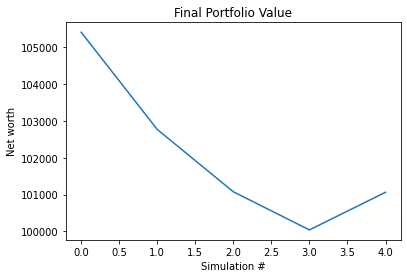

progress 0.00%
progress 16.55%
progress 33.10%
progress 49.65%
progress 66.20%
progress 82.75%
progress 99.30%
Final portfolio: $105933.33814907074


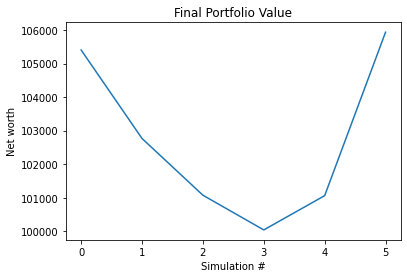

progress 0.00%
progress 16.55%
progress 33.10%
progress 49.65%
progress 66.20%
progress 82.75%
progress 99.30%
Final portfolio: $103053.20202255249


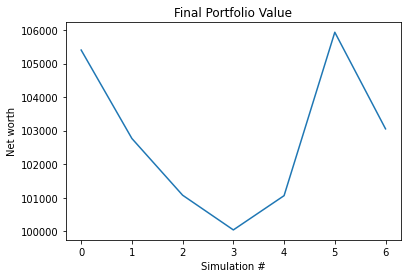

progress 0.00%
progress 16.55%
progress 33.10%
progress 49.65%
progress 66.20%
progress 82.75%
progress 99.30%
Final portfolio: $101013.39014434814


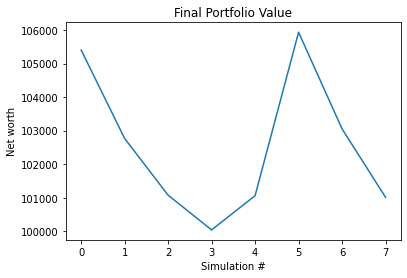

progress 0.00%
progress 16.55%
progress 33.10%
progress 49.65%
progress 66.20%
progress 82.75%
progress 99.30%
Final portfolio: $100696.31569766998


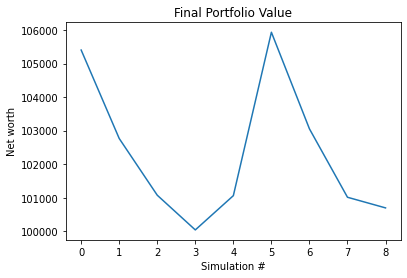

progress 0.00%
progress 16.55%
progress 33.10%
progress 49.65%
progress 66.20%
progress 82.75%
progress 99.30%
Final portfolio: $101234.2394695282


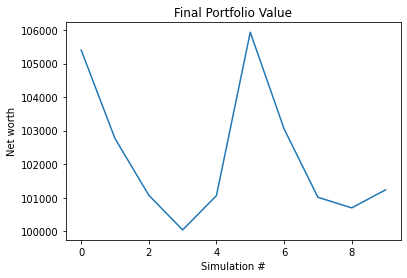

In [8]:
prices = get_prices('MSFT', '1992-07-22', '2016-07-22')
plot_prices(prices)
actions = ['Buy', 'Sell', 'Hold']
hist = 3
policy = RandomDecisionPolicy(actions)
budget = 100000.0
num_stocks = 0
run_simulations(policy, budget, num_stocks, prices, hist)